In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
# Set the path to your dataset
dataset_path = '../input/weather-dataset/dataset'

In [4]:
# Load images from directory with train-validation split
batch_size = 32
img_height, img_width = 224, 224

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6862 files belonging to 11 classes.
Using 5490 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6862 files belonging to 11 classes.
Using 1372 files for validation.


In [7]:
# Class names
class_names = train_ds.class_names
print("Class Names:", class_names)

Class Names: ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']


In [8]:
# Configure dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
# Define the CNN model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 371s 2s/step - accuracy: 0.3960 - loss: 1.7766 - val_accuracy: 0.6254 - val_loss: 1.1483
Epoch 2/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.6489 - loss: 1.0594 - val_accuracy: 0.6596 - val_loss: 1.0298
Epoch 3/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 0.6850 - loss: 0.9405 - val_accuracy: 0.5999 - val_loss: 1.2685
Epoch 4/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step - accuracy: 0.7073 - loss: 0.8698 - val_accuracy: 0.6822 - val_loss: 1.0034
Epoch 5/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.7572 - loss: 0.7037 - val_accuracy: 0.6975 - val_loss: 0.9435
Epoch 6/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.7878 - loss: 0.6202 - val_accuracy: 0.7194 - val_loss: 0.9469
Epoch 7/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.8494 - loss: 0.4450 - val_accuracy: 0.7055 - val_loss: 1.0840
Epoch 8/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.8473 - loss: 0.4357 - val_accu

In [15]:
# Plot training and validation accuracy/loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

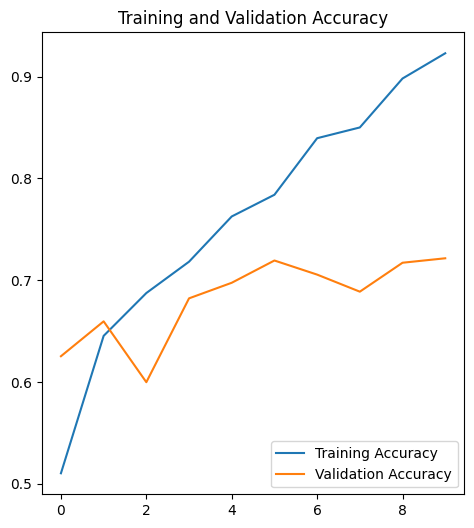

In [16]:
epochs_range = range(epochs)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

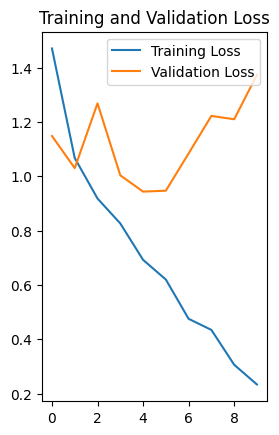

In [17]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()